In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

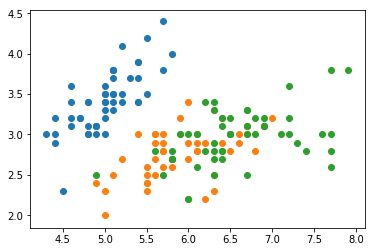

In [3]:
y = iris.target
X = iris.data[y<3,:2]
y = iris.target[y<3]

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth = 2,criterion = "entropy")
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
from playML.metrics import plot_decision_boundary
X.min()

2.0

8.9 5.4
3.3 1.0
[[3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 ...
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]
 [3.3  3.32 3.34 ... 8.84 8.86 8.88]] [[1.   1.   1.   ... 1.   1.   1.  ]
 [1.02 1.02 1.02 ... 1.02 1.02 1.02]
 [1.04 1.04 1.04 ... 1.04 1.04 1.04]
 ...
 [5.34 5.34 5.34 ... 5.34 5.34 5.34]
 [5.36 5.36 5.36 ... 5.36 5.36 5.36]
 [5.38 5.38 5.38 ... 5.38 5.38 5.38]]


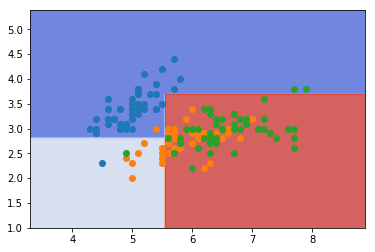

In [6]:
plot_decision_boundary(dt_clf, X, y)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [55]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0],axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1,1),
        np.linspace(axis[2],axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth = 5, cmap = custom_cmap)

C:\Users\Amo\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


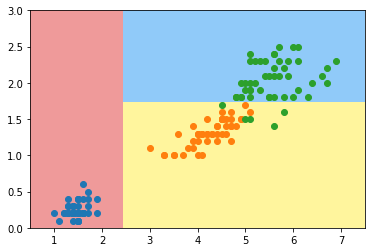

In [56]:
plot_decision_boundary(dt_clf, axis = [0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
shuffle_indexes = np.random.permutation(len(X))
shuffle_indexes

array([ 28, 102, 132,  95, 107,  75,  72,  23,  71,   0, 125,  17,  38,
        60,  47,   2,  10,  81, 139,  25, 142,  98,   1,   6, 126,  94,
       106, 145,  46,  54, 108,  32, 100,  16, 103, 124,  68,   3, 101,
        49,  56, 146, 136, 135, 130,  42,  84,  14,  29,  41, 131,  67,
       138,  80,  51, 123,  37,  63,  76,  50,  86,  62,  52, 127, 112,
       118,  30,  53,  73,  19,  13,  64, 128,  20,  43,  59,  36,  88,
        96,   4,  55,  85,   5,  77,  89, 122,  48,  78, 148, 117,  61,
        44,   7, 134,  57, 105,  15,   8, 141,  82, 109, 120, 104,  70,
       147, 111,   9,  34, 121,  39,  74, 110,  33,  45, 114,  83,  40,
        79, 137,  65,  58, 143, 113,  27,  92,  22,  66, 129, 144,  97,
       119,  99,  93, 116,  31,  21, 140,  11,  26,  35,  69, 115,  91,
        18,  24, 133,  90,  12, 149,  87])

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
from playML.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
from playML.kNN import KNNClassifier
my_knn_clf = KNNClassifier(k=4)
my_knn_clf.fit(X_train, y_train)

KNN(k=4)

In [18]:
y_predict = my_knn_clf.predict(X_test)
correct = sum(y_predict==y_test)
T_ratio = correct/len(y_test)
T_ratio

0.7666666666666667

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 666)

<function matplotlib.pyplot.show(*args, **kw)>

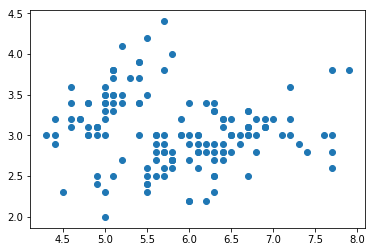

In [20]:
plt.scatter(X[:,0], X[:,1])
plt.show

In [21]:
y = iris.target

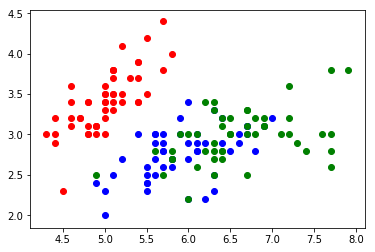

In [22]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
plt.scatter(X[y==2, 0], X[y==2, 1], color="green")
plt.show()

In [23]:
X = iris.data[:,2:]

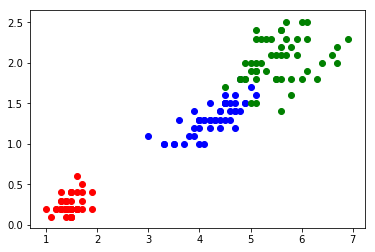

In [24]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
plt.scatter(X[y==2, 0], X[y==2, 1], color="green")
plt.show()